In [2]:
%matplotlib inline
import csv
import numpy as np
import seaborn as sns; sns.set()
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt

In [3]:
def load_data(csv_sheet):
    x = list()
    y = list()
    o = list()
    with open(csv_sheet, 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
            o.append(float(row[2]))
        
    x = np.array(x)
    y = np.array(y)
    o = np.array(o)
    return x,y,o

In [11]:
def dist(array, startx, starty):
    dist =[]
    for x,y,z in array:
        dist.append(np.sqrt((x-startx)**2+(y-starty)**2))
    return dist

In [5]:
def plot_xyo(x_, y_, o_):
    sns.distplot(x_, hist=False, rug=True, kde_kws={"shade": True})
    plt.xlabel('range of poses in X (cm)')
    plt.show()
    sns.distplot(y_, hist=False, rug =True, kde_kws={"shade": True})
    plt.xlabel('range of poses in Y (cm)')
    plt.show()
    sns.distplot(o_, hist=False, rug=True, kde_kws={"shade": True})
    plt.xlabel('range of the orientation in radians')
    plt.show()

In [105]:
x_s_str, y_s_str, o_s_str= load_data('csv/camera poses straight - Sheet1.csv')
x_s_left, y_s_left, o_s_left= load_data('csv/camera poses left - Sheet1.csv')
x_s_right, y_s_right, o_s_right=load_data('csv/camera poses right - Sheet1.csv')
s_array_str= np.array([x_s_str,y_s_str,o_s_str])
s_array_left=np.array([x_s_left, y_s_left, o_s_left])
s_array_right=np.array([x_s_right, y_s_right, o_s_right])

#obtain data from the csv for the object of medium mass
csv_sheet_str = 'csv/midle_straight - Sheet1.csv'
csv_sheet_left = 'csv/midle_straight - left.csv'
csv_sheet_right = 'csv/midle_straight - right.csv'


#load the data as an array
x_m_str, y_m_str, o_m_str = load_data(csv_sheet_str)
x_m_left, y_m_left, o_m_left = load_data(csv_sheet_left)
x_m_right, y_m_right, o_m_right = load_data(csv_sheet_right)

m_array_str= np.array([x_m_str,y_m_str,o_m_str])
m_array_left=np.array([x_m_left, y_m_left, o_m_left])
m_array_right=np.array([x_m_right, y_m_right, o_m_right])
#obtain data from the csv for the object of large mass
csv_sheet_str_l = 'csv/large motion - Sheet1.csv'
csv_sheet_left_l = 'csv/large motion - Sheet2.csv'
csv_sheet_right_l =  'csv/large motion - Sheet3.csv'

#load the data as an array
x_l_str, y_l_str, o_l_str = load_data(csv_sheet_str_l)
x_l_left, y_l_left, o_l_left = load_data(csv_sheet_left_l)
x_l_right, y_l_right, o_l_right = load_data(csv_sheet_right_l)

l_array_str= np.array([x_l_str,y_l_str,o_l_str])
l_array_left=np.array([x_l_left, y_l_left, o_l_left])
l_array_right=np.array([x_l_right, y_l_right, o_l_right])

In [18]:
print m_array_str

[[-88.7  -88.34 -87.48 -89.29 -89.25 -87.55 -87.6  -87.41 -87.47 -88.47
  -88.57 -87.49 -93.84 -87.52 -89.42 -87.45 -89.03 -87.4  -87.63 -87.2 ]
 [-71.97 -72.26 -71.55 -72.86 -72.83 -71.57 -71.68 -71.55 -71.58 -72.21
  -71.61 -71.51 -76.13 -71.59 -72.87 -71.48 -72.59 -71.3  -71.61 -71.31]
 [  1.73   1.53   1.56   1.51   1.51   1.52   1.34   1.52   1.42   1.47
    1.5    1.51   1.46   1.55   1.54   1.51   1.53   1.48   1.51   1.27]]


In [8]:
import numpy as np
from scipy import stats
import seaborn as sns
from pylab import*
from math import*
import numpy as np
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [19]:
def conv_to_deg(array):
    print np.rad2deg(array)
    
conv_to_deg(m_array_str[2,:])

[ 99.12169856  87.66254266  89.38141604  86.51662706  86.51662706
  87.08958486  76.77634455  87.08958486  81.36000691  84.22479588
  85.94366927  86.51662706  83.65183809  88.80845825  88.23550045
  86.51662706  87.66254266  84.79775368  86.51662706  72.76563998]


In [101]:
def compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Middle object- Straight Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=m_array_str, 
                           zoom_ax=[-86, -92, -69, -74], theta=np.rad2deg(m_array_str[2,:]) ):
    fig ,axes = subplots(1, figsize=(8,8))
#     startx=26.27
#     starty=0.0
    title(plot_title)
    xlabel('X- cm')
    ylabel('Y- cm')
    xlim(xlimit[0],xlimit[1])
    ylim(ylimit[0],ylimit[1])
    yscale('linear')
    xscale('linear')
    end_xy = motion_arr.T
#plot(end_xy[:,0],end_xy[:,1])
    axes.grid(color='g', linestyle='--', linewidth=1)
    axes.scatter(startx,starty, color='r', marker=(3,0,0))

    axins = zoomed_inset_axes(axes ,10, loc=7)
    
    axins.invert_xaxis()
    axins.axis(zoom_ax)
    axins.xaxis.tick_top()
    mark_inset(axes, axins, loc1=2, loc2=4, fc="black",lw=0.5, ec='black')

#axes[0].step(10.75,9.50, color='r')
    for i in range(20):
        axes.scatter(end_xy[i,0],end_xy[i,1],marker=(3,0,theta[i]+0),s=20)
#     axes.scatter(end_xy[:,0],end_xy[:,1],marker=(3,0,theta[:]))
    axes.scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker='*', color='black')
    for i in range(20):
        scatter(end_xy[i,0],end_xy[i,1],marker=(3,0,theta[i]+0), s=80)
#     scatter(end_xy[:,0],end_xy[:,1],marker='+')
    scatter(end_xy[:,0].mean(),end_xy[:,1].mean(), marker=(3,0,theta.mean()+0), s=100, color='black')
#axes.annotate(r'stop', xy=(.6,.15), color='#0c1799')
    print ("Mean X",end_xy[:,0].mean())
    print ("Mean Y",end_xy[:,1].mean())

    print ("std X",end_xy[:,0].std())
    print ("std Y",end_xy[:,1].std())

    print ("X ----range>>>",end_xy[:,0].min() ,"-",end_xy[:,0].max())
    print ("Y ----range>>>",end_xy[:,1].min() ,"-",end_xy[:,1].max())

#     distance = dist(end_xy,startx,starty )
#     distance= np.asarray(distance)
#     print ("mean traveled distance : ",distance.mean())
#     print ("max traveled distance : ",distance.max())
#     print ("min traveled distance : ",distance.min())
#     figname=concat(plot_title.split(" ")[0],".png")
    savefig(filename=plot_title.split(" ")[0]+".png", dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None)

('Mean X', -88.355499999999992)
('Mean Y', -72.10299999999998)
('std X', 1.4530157432044579)
('std Y', 1.0561349345609199)
('X ----range>>>', -93.840000000000003, '-', -87.200000000000003)
('Y ----range>>>', -76.129999999999995, '-', -71.299999999999997)


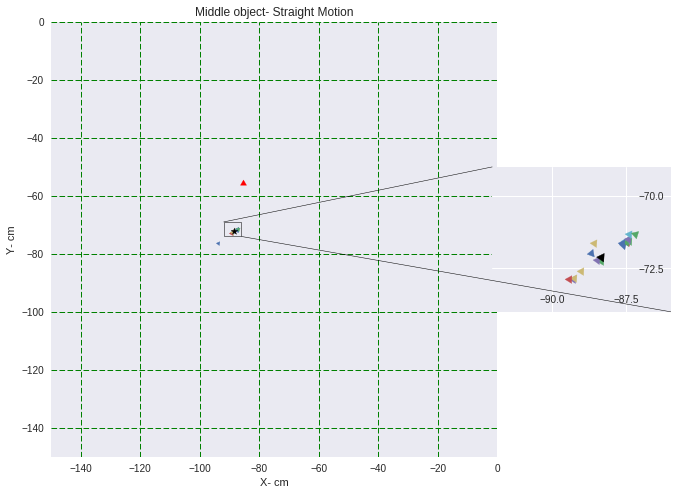

In [90]:
compute_all_with_theta()

('Mean X', -44.381)
('Mean Y', -44.128)
('std X', 0.43190160916579118)
('std Y', 0.3617678813825243)
('X ----range>>>', -45.329999999999998, '-', -43.329999999999998)
('Y ----range>>>', -44.990000000000002, '-', -43.259999999999998)


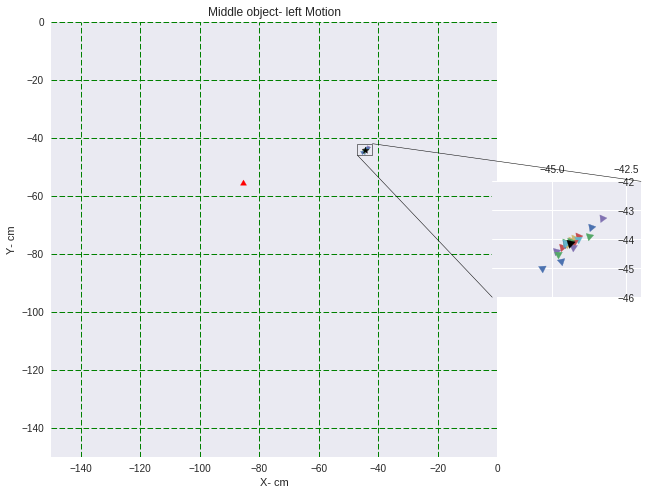

In [77]:
compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Middle object- left Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=m_array_left, 
                           zoom_ax=[-42, -47, -46, -42], theta=np.rad2deg(m_array_left[2,:]) )

('Mean X', -113.64700000000001)
('Mean Y', -71.156999999999996)
('std X', 1.016519060323021)
('std Y', 0.58122370908282839)
('X ----range>>>', -115.56999999999999, '-', -111.83)
('Y ----range>>>', -72.280000000000001, '-', -70.129999999999995)


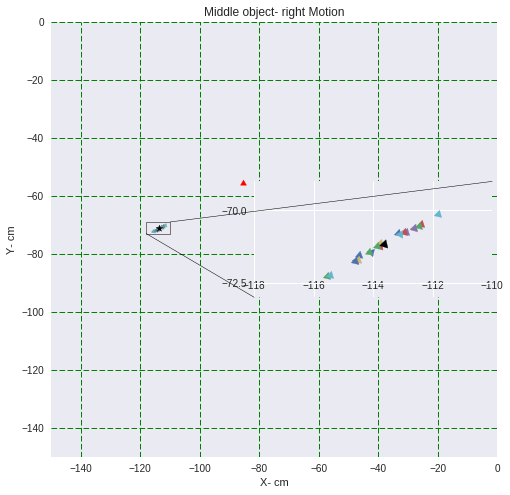

In [94]:
compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Middle object- right Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=m_array_right, 
                           zoom_ax=[-118, -110, -69, -73], theta=np.rad2deg(m_array_right[2,:]) )

### For Large object

('Mean X', -84.011499999999984)
('Mean Y', -67.975999999999985)
('std X', 1.0370837719297317)
('std Y', 0.74563664073059022)
('X ----range>>>', -86.230000000000004, '-', -82.840000000000003)
('Y ----range>>>', -69.579999999999998, '-', -67.140000000000001)
('Mean X', -42.3185)
('Mean Y', -41.7455)
('std X', 0.40163758539260253)
('std Y', 0.32060060823398323)
('X ----range>>>', -43.82, '-', -41.899999999999999)
('Y ----range>>>', -42.93, '-', -41.259999999999998)
('Mean X', -109.45449999999998)
('Mean Y', -67.433500000000009)
('std X', 1.1621207983682249)
('std Y', 0.62148431195002751)
('X ----range>>>', -111.83, '-', -106.88)
('Y ----range>>>', -68.579999999999998, '-', -66.090000000000003)


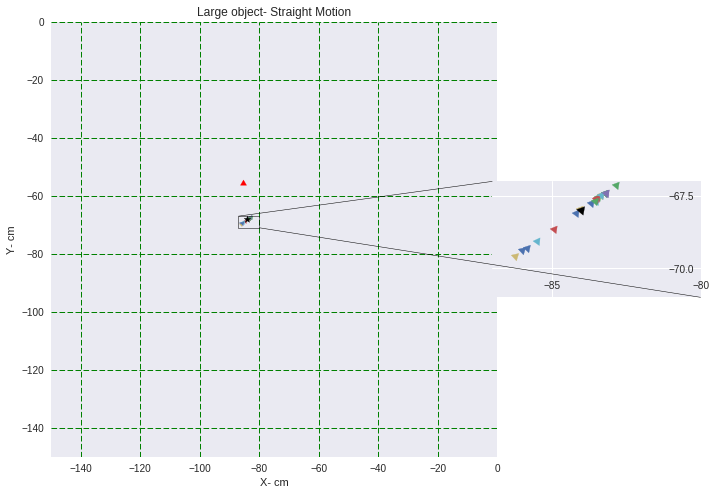

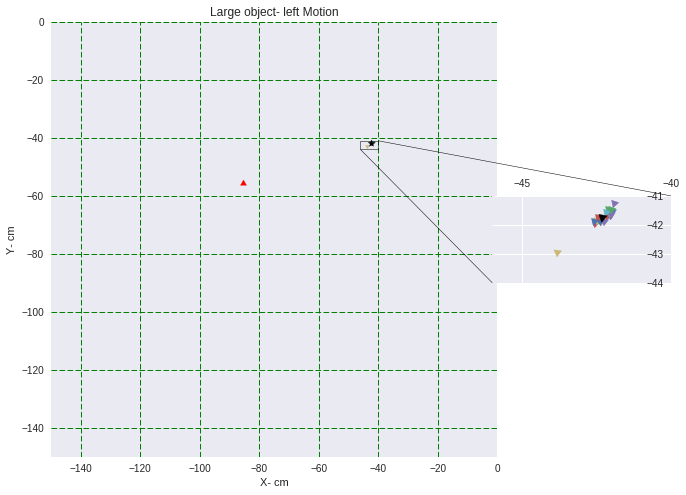

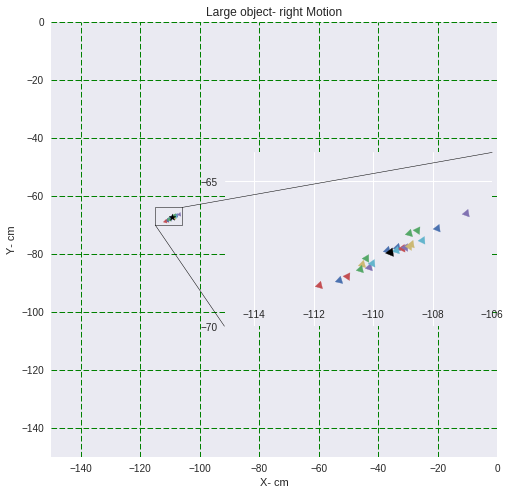

In [103]:
compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Large object- Straight Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=l_array_str, 
                           zoom_ax=[-80, -87, -67, -71], theta=np.rad2deg(l_array_str[2,:]) )

compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Large object- left Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=l_array_left, 
                           zoom_ax=[-40, -46, -44, -41], theta=np.rad2deg(l_array_left[2,:]) )

compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='Large object- right Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=l_array_right, 
                           zoom_ax=[-115, -106, -64, -70], theta=np.rad2deg(l_array_right[2,:]) )

### For small object

/home/chetan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-80, right=-80
  'left=%s, right=%s') % (left, right))
/home/chetan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-71, top=-71
  'bottom=%s, top=%s') % (bottom, top))


('Mean X', -116.1855)
('Mean Y', -91.956999999999979)
('std X', 20.972683537163288)
('std Y', 13.493743402036369)
('X ----range>>>', -150.49000000000001, '-', -89.349999999999994)
('Y ----range>>>', -114.04000000000001, '-', -74.709999999999994)
('Mean X', -48.797999999999995)
('Mean Y', -49.2425)
('std X', 0.61278544369134669)
('std Y', 0.51091951420943016)
('X ----range>>>', -49.840000000000003, '-', -47.82)
('Y ----range>>>', -50.090000000000003, '-', -48.310000000000002)
('Mean X', -115.38500000000002)
('Mean Y', -74.578000000000003)
('std X', 0.53765695382836731)
('std Y', 0.35505774178293792)
('X ----range>>>', -116.8, '-', -114.64)
('Y ----range>>>', -75.489999999999995, '-', -73.950000000000003)


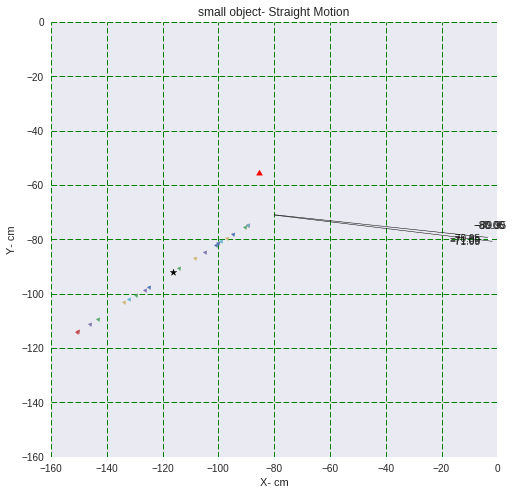

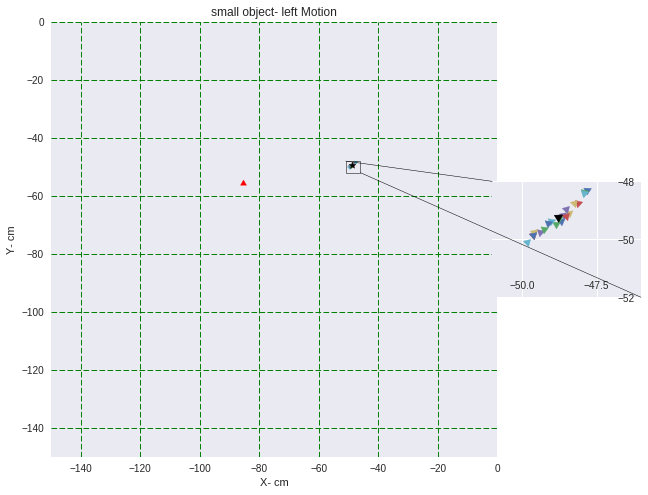

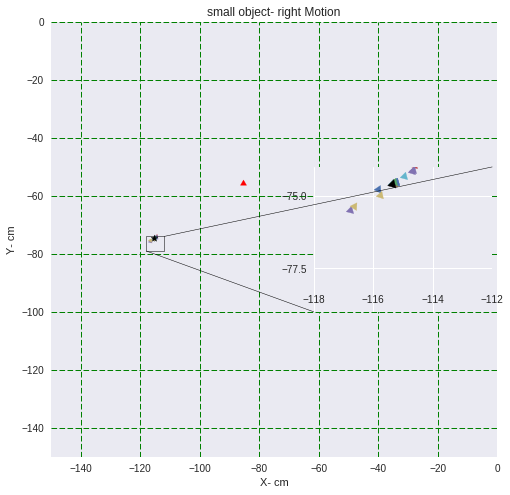

In [108]:
compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='small object- Straight Motion', 
                           xlimit=[-160,0], ylimit=[-160,0], motion_arr=s_array_str, 
                           zoom_ax=[-80, -80, -71, -71], theta=np.rad2deg(l_array_str[2,:]) )

compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='small object- left Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=s_array_left, 
                           zoom_ax=[-46, -51, -48, -52], theta=np.rad2deg(s_array_left[2,:]) )

compute_all_with_theta(startx=-85.41 ,starty=-55.60, plot_title='small object- right Motion', 
                           xlimit=[-150,0], ylimit=[-150,0], motion_arr=s_array_right, 
                           zoom_ax=[-118, -112, -74, -79], theta=np.rad2deg(s_array_right[2,:]) )